In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
data = pd.read_csv('transaction_log.csv')

In [76]:
data.shape

(6695, 3)

In [77]:
data.head()

,cust,date,sales
0,4,1997-01-18,29.73
1,4,1997-08-02,14.96
2,4,1997-12-12,26.48
3,18,1997-01-04,14.96
4,21,1997-01-01,63.34


In [78]:
data['date'] = pd.to_datetime(data['date'])

In [79]:
# add column: days between transaction 
data['date2'] = data.groupby('cust')['date'].shift()
data['date_diff'] = data['date'] - data['date2']
data['date_delta'] = pd.to_numeric(data['date_diff'].dt.days, downcast='integer')

In [80]:
data.head()

,cust,date,sales,date2,date_diff,date_delta
0,4,1997-01-18,29.73,NaT,NaT,NaN
1,4,1997-08-02,14.96,1997-01-18,196 days,196.0
2,4,1997-12-12,26.48,1997-08-02,132 days,132.0
3,18,1997-01-04,14.96,NaT,NaT,NaN
4,21,1997-01-01,63.34,NaT,NaT,NaN


In [81]:
# add columns: mean days between transactions, mean transaction amount, number of transactions 
data_new = data.groupby('cust').agg({
    'date_delta': 'mean'
    , 'sales': 'mean'
    , 'date': 'count'
})

In [82]:
data_new.head()

,date,date_delta,sales
cust,,,
4,3,164.0,23.723333
18,1,NaN,14.960000
21,2,12.0,37.555000
50,1,NaN,6.790000
60,1,NaN,21.750000


In [83]:
data_new.columns = ['count', 'delta_avg', 'money_avg']

In [84]:
data_new.head()

,count,delta_avg,money_avg
cust,,,
4,3,164.0,23.723333
18,1,NaN,14.960000
21,2,12.0,37.555000
50,1,NaN,6.790000
60,1,NaN,21.750000


/Users/yy/anaconda/envs/py37/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


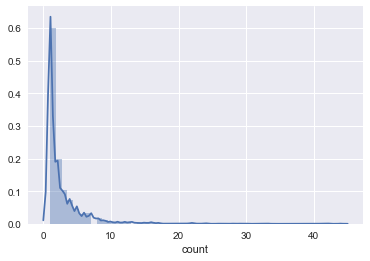

In [85]:
import seaborn as sns
sns.distplot(data_new['count'])

/Users/yy/anaconda/envs/py37/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


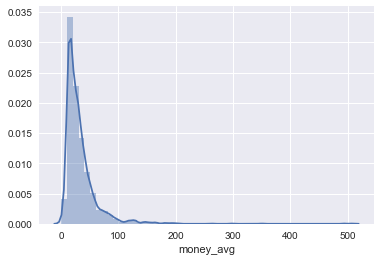

In [86]:
sns.distplot(data_new['money_avg'])

/Users/yy/anaconda/envs/py37/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


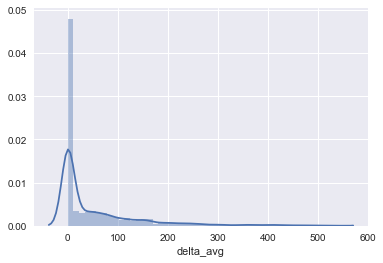

In [87]:
data_new['delta_avg'].fillna(0, inplace = True)
sns.distplot(data_new['delta_avg'])

In [88]:
# делим данные на бины по персентилям 
data_new['F'] = pd.qcut(data_new['count'], 4, duplicates = 'drop', labels = range(1,3))
data_new['M'] = pd.qcut(data_new['money_avg'], 4, labels = range(1,5))
data_new['D'] = pd.qcut(data_new['delta_avg'], 4, duplicates = 'drop', labels = range(2,0,-1))

In [89]:
# что делать со средним количеством дней между транзакциями, если всего одна транзакция? 
# максимальная дата в датасете минус дата последней транзакции? включить в среднее или вместо среднего?
data_new.head(20)

,count,delta_avg,money_avg,F,M,D
cust,,,,,,
4,3,164.000000,23.723333,1,2,1
18,1,0.000000,14.960000,1,1,2
21,2,12.000000,37.555000,1,3,2
50,1,0.000000,6.790000,1,1,2
60,1,0.000000,21.750000,1,2,2
71,1,0.000000,13.970000,1,1,2
86,1,0.000000,23.940000,1,2,2
111,16,35.666667,69.190000,2,4,2
112,2,35.000000,11.770000,1,1,2


In [90]:
def join_fmd(x): 
    return str(x['F']) + str(x['M']) + str(x['D'])

In [91]:
# add segment column
data_new['segment'] = data_new.apply(join_fmd, axis = 1)

In [92]:
data_new.head(20)

,count,delta_avg,money_avg,F,M,D,segment
cust,,,,,,,
4,3,164.000000,23.723333,1,2,1,121
18,1,0.000000,14.960000,1,1,2,112
21,2,12.000000,37.555000,1,3,2,132
50,1,0.000000,6.790000,1,1,2,112
60,1,0.000000,21.750000,1,2,2,122
71,1,0.000000,13.970000,1,1,2,112
86,1,0.000000,23.940000,1,2,2,122
111,16,35.666667,69.190000,2,4,2,242
112,2,35.000000,11.770000,1,1,2,112


In [93]:
data_new['segment'].value_counts()

112    518
142    327
132    312
122    300
121    111
242    108
232    104
141    104
231     88
131     85
222     83
111     74
221     62
241     50
212     16
211     15
Name: segment, dtype: int64

In [94]:
# колонка FMD_Score - сумма скоров по категориям 
data_new['FMD_score'] = data_new[['F', 'M', 'D']].sum(axis = 1)

In [95]:
data_new.head()

,count,delta_avg,money_avg,F,M,D,segment,FMD_score
cust,,,,,,,,
4,3,164.0,23.723333,1,2,1,121,4.0
18,1,0.0,14.960000,1,1,2,112,4.0
21,2,12.0,37.555000,1,3,2,132,6.0
50,1,0.0,6.790000,1,1,2,112,4.0
60,1,0.0,21.750000,1,2,2,122,5.0


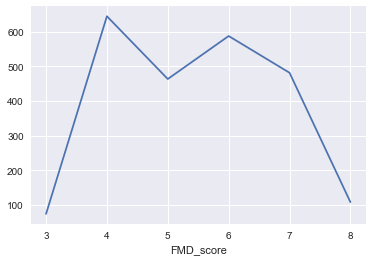

In [96]:
data_new.groupby('FMD_score')['segment'].count().plot()

In [97]:
data_new.reset_index(inplace = True)

In [98]:
data_new.groupby('FMD_score')['segment'].count()

FMD_score
3.0     74
4.0    644
5.0    463
6.0    587
7.0    481
8.0    108
Name: segment, dtype: int64

In [99]:
 #data_new.reset_index(inplace = True)

In [100]:
table = pd.pivot_table(data_new, values='cust', index=['F', 'D'],
                    columns=['M'], aggfunc = np.count_nonzero)

In [101]:
table

M      1    2    3    4
F D                    
1 2  518  300  312  327
  1   74  111   85  104
2 2   16   83  104  108
  1   15   62   88   50

In [102]:
data_new[(data_new['F'] == 2)&(data_new['D'] == 2)&(data_new['M'] == 1)].shape

(16, 9)

In [103]:
data_new.head()

,cust,count,delta_avg,money_avg,F,M,D,segment,FMD_score
0,4,3,164.0,23.723333,1,2,1,121,4.0
1,18,1,0.0,14.960000,1,1,2,112,4.0
2,21,2,12.0,37.555000,1,3,2,132,6.0
3,50,1,0.0,6.790000,1,1,2,112,4.0
4,60,1,0.0,21.750000,1,2,2,122,5.0
